# Posterior predictive checks

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
from theano import shared
from theano import tensor as tt

In [4]:
dummy_data = np.loadtxt('C:/Users/kamguia_l/Documents/data/dummy.csv')
dummy_data[:5,]
#dummy_data.describe()

array([[-1.081,  9.357],
       [-0.888,  8.322],
       [-0.623,  8.745],
       [-0.48 ,  7.346],
       [-0.505,  7.028]])

In [6]:
x_1 = dummy_data[:,0]
y_1 = dummy_data[:,1]

Text(0, 0.5, 'y')

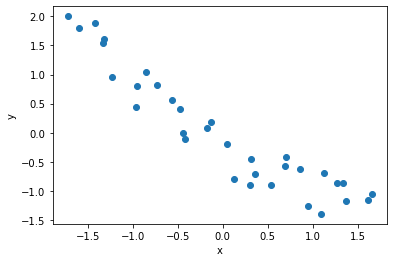

In [7]:
order = 2
x_1p = np.vstack([x_1**i for i in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / \
    x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

In [9]:
x_1s.shape

(2, 33)

In [12]:
x_1.shape

(33,)

In [13]:
x_1s

array([[-1.72414181, -1.5947931 , -1.41718994, -1.32135125, -1.33810627,
        -1.23087417, -0.96480453, -0.95877273, -0.85556184, -0.73492573,
        -0.56871598, -0.41591024, -0.4795793 , -0.44137787, -0.17932943,
        -0.12839419,  0.04786857,  0.11890983,  0.31862961,  0.3072362 ,
         0.36085225,  0.5310832 ,  0.69863335,  0.69662275,  0.85344969,
         0.95263938,  1.12354053,  1.0907007 ,  1.26897406,  1.33800472,
         1.37151475,  1.61412737,  1.66104141],
       [-0.6811725 , -0.76003053, -0.84312138, -0.87585202, -0.87074204,
        -0.89896365, -0.92310164, -0.9228906 , -0.91407052, -0.89128571,
        -0.83786718, -0.76623575, -0.7987041 , -0.77967256, -0.61277348,
        -0.57296772, -0.41671773, -0.34562583, -0.12078093, -0.13459894,
        -0.06852717,  0.15885519,  0.40880321,  0.40565007,  0.66281204,
         0.83719337,  1.15897266,  1.09504594,  1.45405472,  1.6009563 ,
         1.67385522,  2.23259249,  2.34691077]])

In [14]:
x_1p

array([[-1.0810000e+00, -8.8800000e-01, -6.2300000e-01, -4.8000000e-01,
        -5.0500000e-01, -3.4500000e-01,  5.2000000e-02,  6.1000000e-02,
         2.1500000e-01,  3.9500000e-01,  6.4300000e-01,  8.7100000e-01,
         7.7600000e-01,  8.3300000e-01,  1.2240000e+00,  1.3000000e+00,
         1.5630000e+00,  1.6690000e+00,  1.9670000e+00,  1.9500000e+00,
         2.0300000e+00,  2.2840000e+00,  2.5340000e+00,  2.5310000e+00,
         2.7650000e+00,  2.9130000e+00,  3.1680000e+00,  3.1190000e+00,
         3.3850000e+00,  3.4880000e+00,  3.5380000e+00,  3.9000000e+00,
         3.9700000e+00],
       [ 1.1685610e+00,  7.8854400e-01,  3.8812900e-01,  2.3040000e-01,
         2.5502500e-01,  1.1902500e-01,  2.7040000e-03,  3.7210000e-03,
         4.6225000e-02,  1.5602500e-01,  4.1344900e-01,  7.5864100e-01,
         6.0217600e-01,  6.9388900e-01,  1.4981760e+00,  1.6900000e+00,
         2.4429690e+00,  2.7855610e+00,  3.8690890e+00,  3.8025000e+00,
         4.1209000e+00,  5.2166560e+00,

In [15]:
x_1p.mean(axis=1, keepdims=True)

array([[1.49157576],
       [4.45113255]])

In [16]:
with pm.Model() as model_l:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10)
    ϵ = pm.HalfNormal('ϵ', 5)
    μ = α + β * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)
    trace_l = pm.sample(2000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_16152/3812288057.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_l = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.


In [17]:
with pm.Model() as model_p:
    α = pm.Normal('α', mu=0, sd=1)
    β = pm.Normal('β', mu=0, sd=10, shape=order)
    ϵ = pm.HalfNormal('ϵ', 5)
    μ = α + pm.math.dot(β, x_1s)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_1s)
    trace_p = pm.sample(2000)

C:\Users\KAMGUI~1\AppData\Local\Temp/ipykernel_16152/1099293836.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_p = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


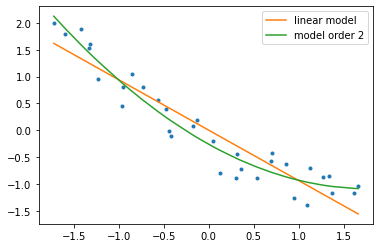

In [18]:
x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)
α_l_post = trace_l['α'].mean()
β_l_post = trace_l['β'].mean(axis=0)
y_l_post = α_l_post + β_l_post * x_new

plt.plot(x_new, y_l_post, 'C1', label='linear model')

α_p_post = trace_p['α'].mean()
β_p_post = trace_p['β'].mean(axis=0)
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

α_p_post = trace_p['α'].mean()
β_p_post = trace_p['β'].mean(axis=0)
x_new_p = np.vstack([x_new**i for i in range(1, order+1)])
y_p_post = α_p_post + np.dot(β_p_post, x_new_p)

plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()

In [19]:
y_l = pm.sample_posterior_predictive(trace_l, 2000,
model=model_l)['y_pred']
y_p = pm.sample_posterior_predictive(trace_p, 2000,
model=model_p)['y_pred']

D:\Anaconda\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


D:\Anaconda\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


([], [])

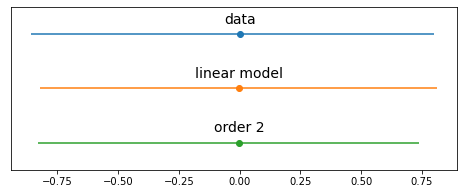

In [20]:
plt.figure(figsize=(8, 3))
data = [y_1s, y_l, y_p]
labels = ['data', 'linear model', 'order 2']
for i, d in enumerate(data):
    mean = d.mean()
    err = np.percentile(d, [25, 75])
    plt.errorbar(mean, -i, xerr=[[-err[0]], [err[1]]], fmt='o')
    plt.text(mean, -i+0.2, labels[i], ha='center', fontsize=14)
plt.ylim([-i-0.5, 0.5])
plt.yticks([])

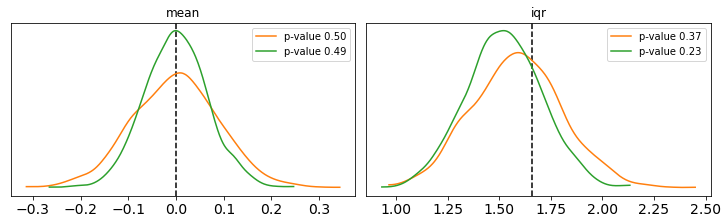

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
def iqr(x, a=0):
    return np.subtract(*np.percentile(x, [75, 25], axis=a))
for idx, func in enumerate([np.mean, iqr]):
    T_obs = func(y_1s)
    ax[idx].axvline(T_obs, 0, 1, color='k', ls='--')
    for d_sim, c in zip([y_l, y_p], ['C1', 'C2']):
        T_sim = func(d_sim, 1)
        p_value = np.mean(T_sim >= T_obs)
        az.plot_kde(T_sim, plot_kwargs={'color': c},
                    label=f'p-value {p_value:.2f}', ax=ax[idx])
    ax[idx].set_title(func.__name__)
    ax[idx].set_yticks([])
    ax[idx].legend()

In [23]:
trace_l['β']

array([-0.94526753, -0.92037611, -0.98295724, ..., -1.05730042,
       -0.79372633, -0.98724291])

Text(0, 0.5, 'y')

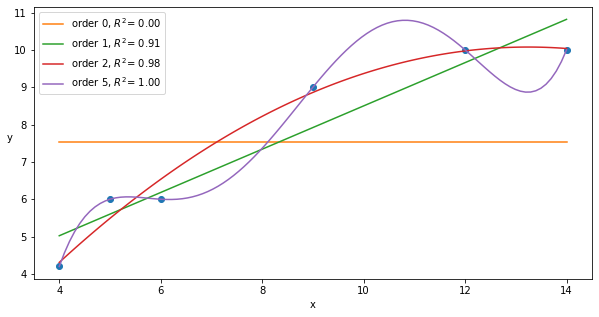

In [24]:
x = np.array([4., 5., 6., 9., 12, 14.])
y = np.array([4.2, 6., 6., 9., 10, 10.])

plt.figure(figsize=(10, 5))
order = [0, 1, 2, 5]
plt.plot(x, y, 'o')
for i in order:
    x_n = np.linspace(x.min(), x.max(), 100)
    coeffs = np.polyfit(x, y, deg=i)
    ffit = np.polyval(coeffs, x_n)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.mean(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    r2 = ssreg / sstot
    
    plt.plot(x_n, ffit, label=f'order {i}, $R^2$= {r2:.2f}')
    
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)

In [25]:
waic_l = az.waic(trace_l)
waic_l

D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Computed from 8000 by 33 log-likelihood matrix

          Estimate       SE
elpd_waic   -14.36     2.67
p_waic        2.43        -

In [26]:
cmp_df = az.compare({'model_l':trace_l, 'model_p':trace_p}, method='BB-pseudo-BMA')
cmp_df

D:\Anaconda\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_p,0,-4.549151,2.652611,0.000000,0.998707,2.636253,0.000000,False,log
model_l,1,-14.385134,2.461177,9.835983,0.001293,2.337992,2.673808,False,log


<AxesSubplot:xlabel='Log'>

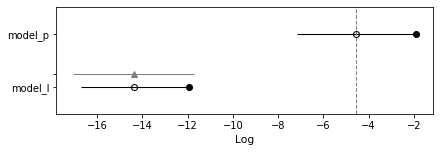

In [27]:
az.plot_compare(cmp_df)

In [28]:
az.loo(trace_l)

D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Computed from 8000 by 33 log-likelihood matrix

         Estimate       SE
elpd_loo   -14.39     2.68
p_loo        2.46        -